In [1]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)



print(california_housing.DESCR)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
california_housing.frame.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
california_housing.target.head()



0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
california_housing.frame.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


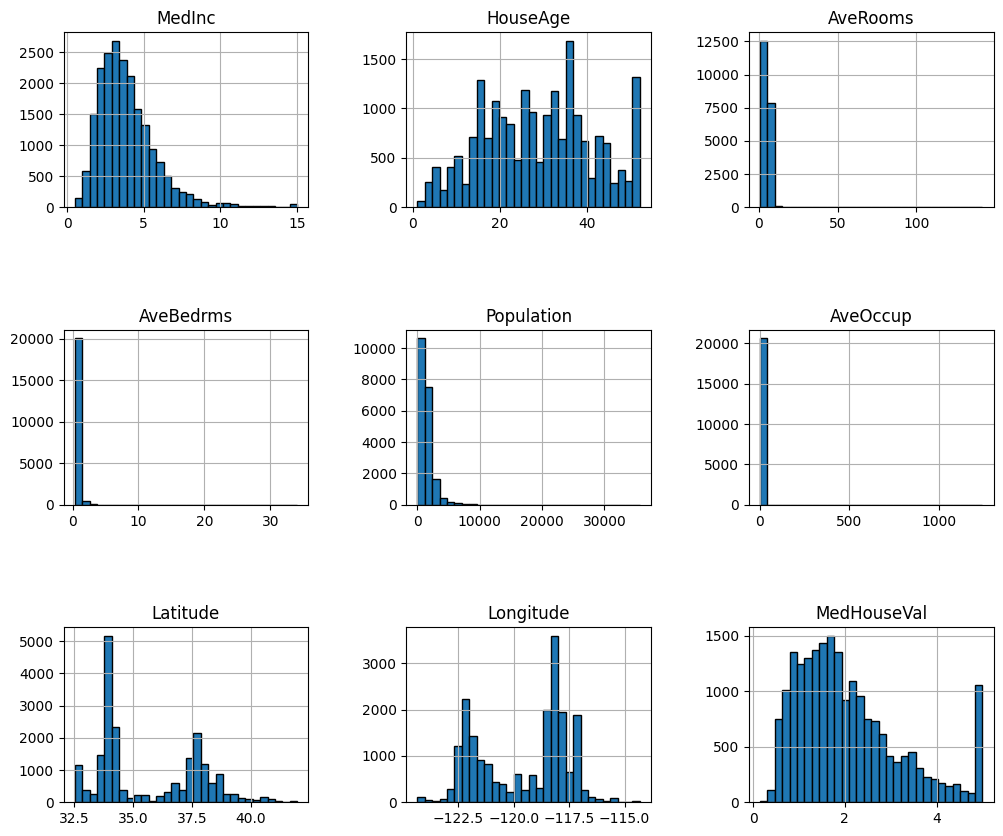

In [6]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)



In [7]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()



,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


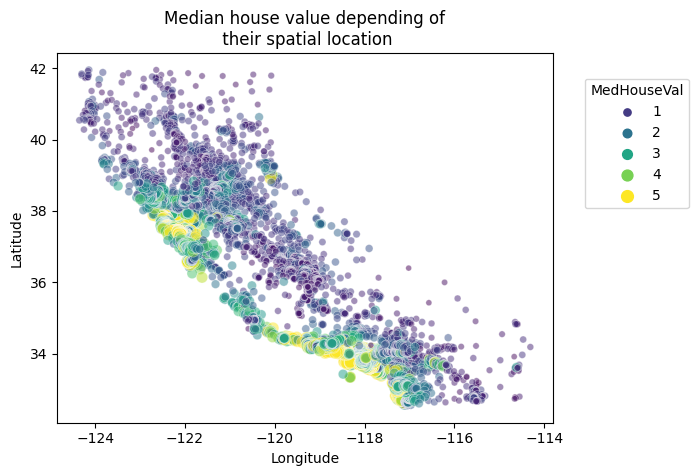

In [8]:
import seaborn as sns

sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")




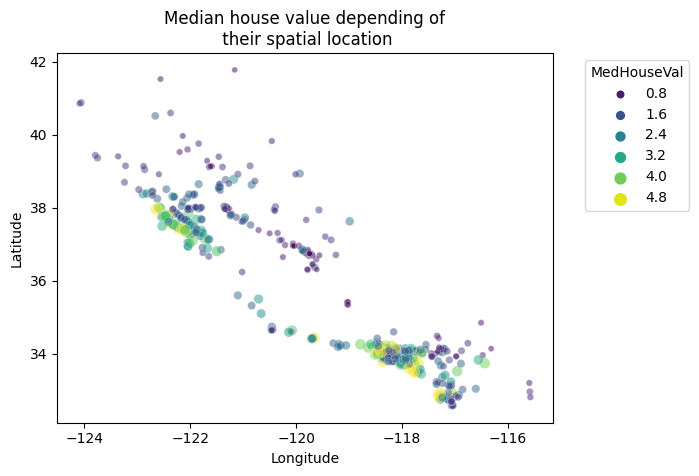

In [9]:
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)

sns.scatterplot(data=california_housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")




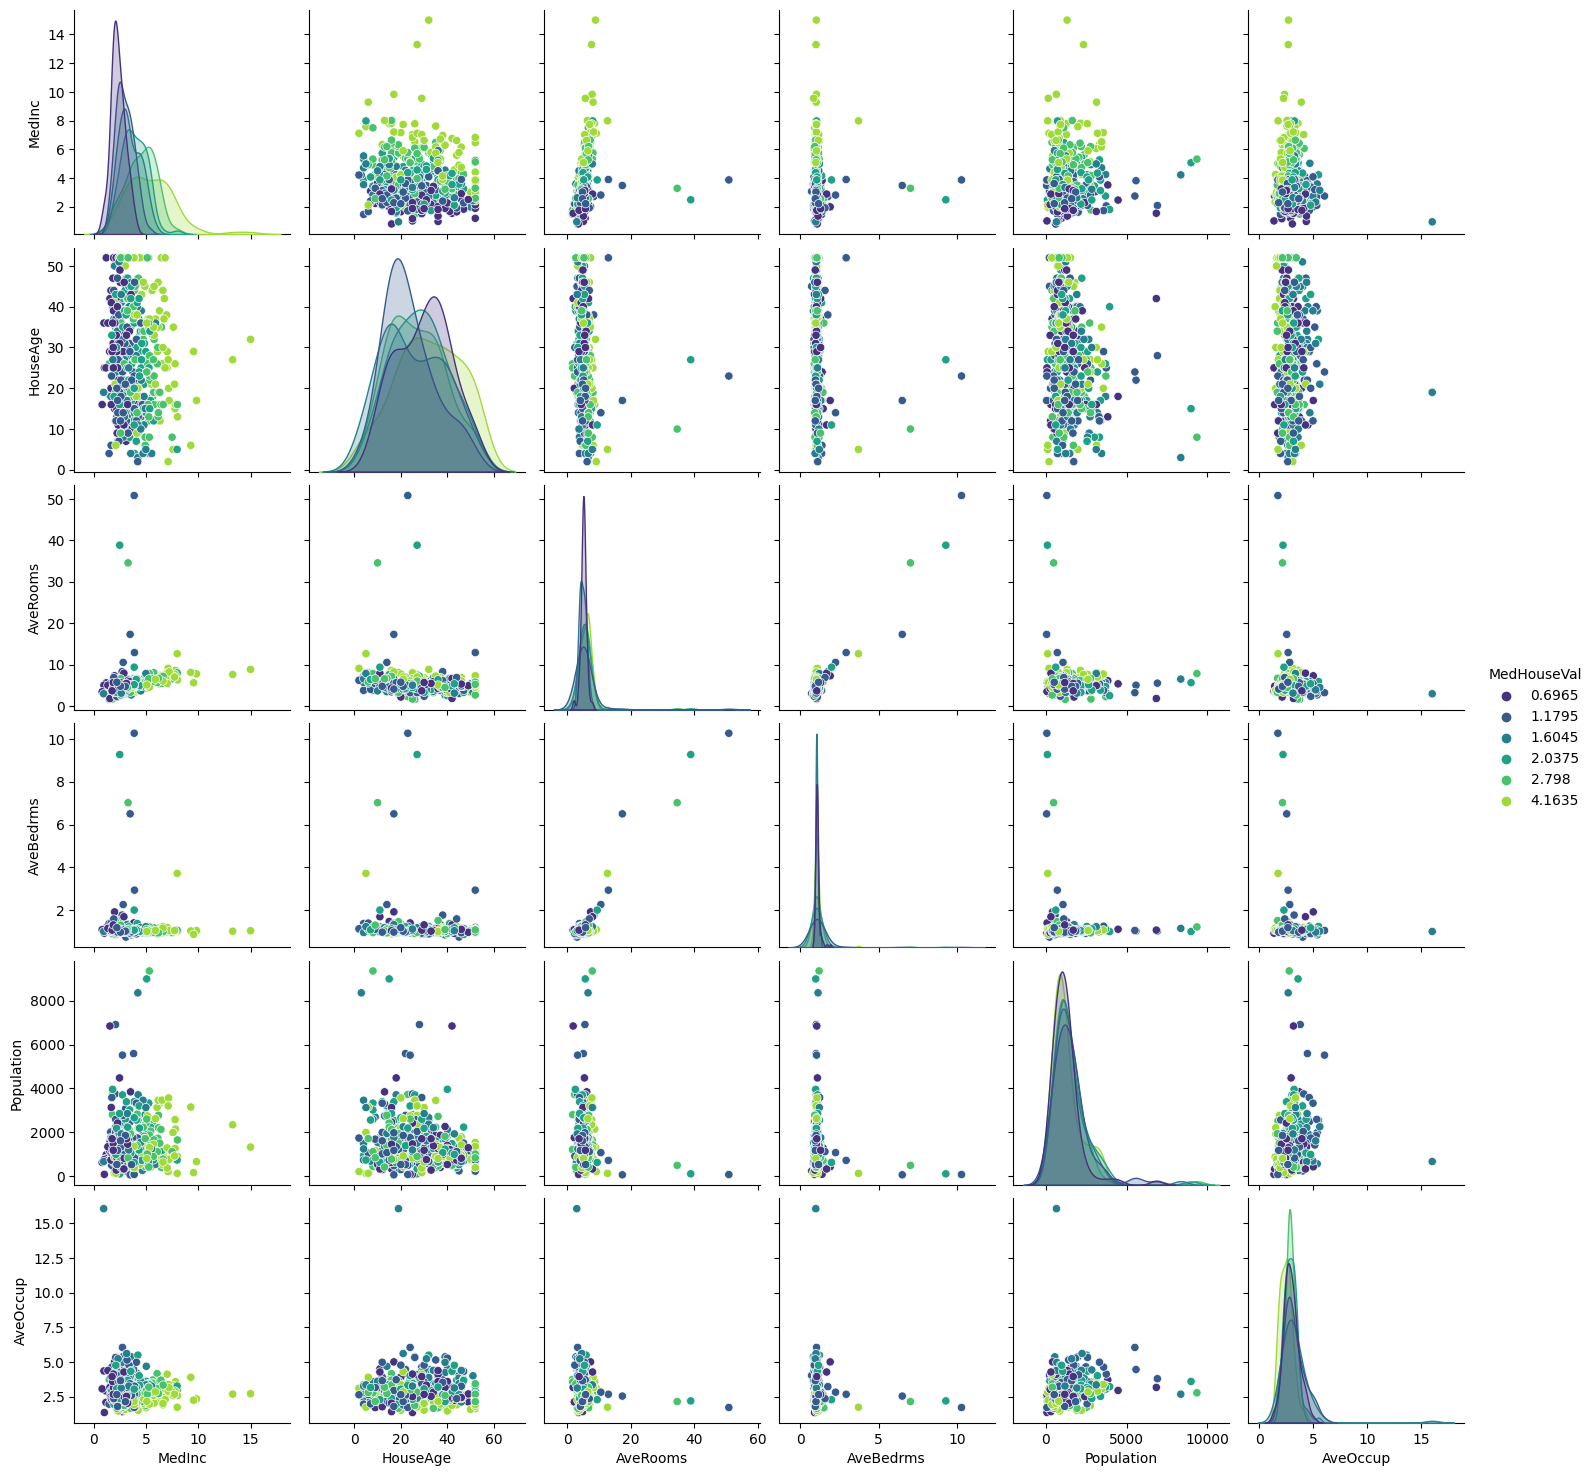

In [10]:
import pandas as pd

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)

_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")




In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30)
model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
cv_results = cross_validate(
    model, california_housing.data, california_housing.target,
    return_estimator=True, n_jobs=2)

score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")


R2 score: 0.553 ± 0.062


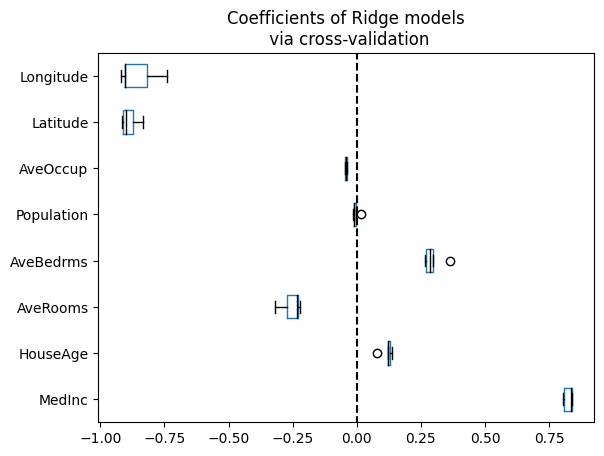

In [12]:
import pandas as pd

coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=california_housing.feature_names
)

color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Coefficients of Ridge models\n via cross-validation")

